## INFERENTIAL STATISTICS

### What's inferential statistics? 

In contrast to descriptive statistics, inferential statistics want to make a statement about the population. 

However, since it is almost impossible in most cases to survey the entire population, a sample is used, i.e. a small data set originating from the population. 

With this sample a statement about the population can be made. An example would be if a sample of 1,000 citizens is taken from the population of all Canadian citizens.

![](https://datatab.net/assets/tutorial/inferential_statistics_definition.png)

![](https://datatab.net/assets/tutorial/inferential-statistics-methods.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('data/train.csv', sep = ',')

# check shape
df.shape

(1460, 81)

In [3]:
# check shape
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# check how many houses per Neighborhood 
df['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [6]:
# total houses in the neighbourhood
all_houses = len(df)
all_houses

1460

In [7]:
# check the probability of choosing a house from each neighbourhood
hoods = df['Neighborhood'].unique().tolist()

x = []

for i in hoods:
    prob = round(len(df[df['Neighborhood'] == i]) / all_houses *100, 1)
    print(f'{i}: {prob}%')
    x.append(prob)

print(f'\nTotal: {int(sum(x))}%')

CollgCr: 10.3%
Veenker: 0.8%
Crawfor: 3.5%
NoRidge: 2.8%
Mitchel: 3.4%
Somerst: 5.9%
NWAmes: 5.0%
OldTown: 7.7%
BrkSide: 4.0%
Sawyer: 5.1%
NridgHt: 5.3%
NAmes: 15.4%
SawyerW: 4.0%
IDOTRR: 2.5%
MeadowV: 1.2%
Edwards: 6.8%
Timber: 2.6%
Gilbert: 5.4%
StoneBr: 1.7%
ClearCr: 1.9%
NPkVill: 0.6%
Blmngtn: 1.2%
BrDale: 1.1%
SWISU: 1.7%
Blueste: 0.1%

Total: 100%


In [8]:
# example of picking a random value
np.random.choice(df['Neighborhood'], 10)

array(['Somerst', 'BrDale', 'Edwards', 'Mitchel', 'Edwards', 'Somerst',
       'NAmes', 'IDOTRR', 'Mitchel', 'Veenker'], dtype=object)

### Conditional probability

GIVEN that we have the probability of picking a house in OldTown neighborhood, we go a step further and AGAIN pick a house from the same neighborhood

In [9]:
# total of houses in OldTown
houses_oldtown = len(df[df['Neighborhood'] == 'OldTown'])
houses_oldtown

113

In [10]:
# chance of getting oldtown
oldtown_prob1 = houses_oldtown / all_houses

# chance of getting oldtow again if the first iteration got oldtown
oldtown_prob2 = (houses_oldtown - 1) / (all_houses - 1)

# enter the probability code
cond_prob = oldtown_prob1 * oldtown_prob2

print(f'The probability of picking a house in OldTown and again picking OldTown in the first two iteration is {"{:.2f}".format(cond_prob * 100)}%')

The probability of picking a house in OldTown and again picking OldTown in the first two iteration is 0.59%


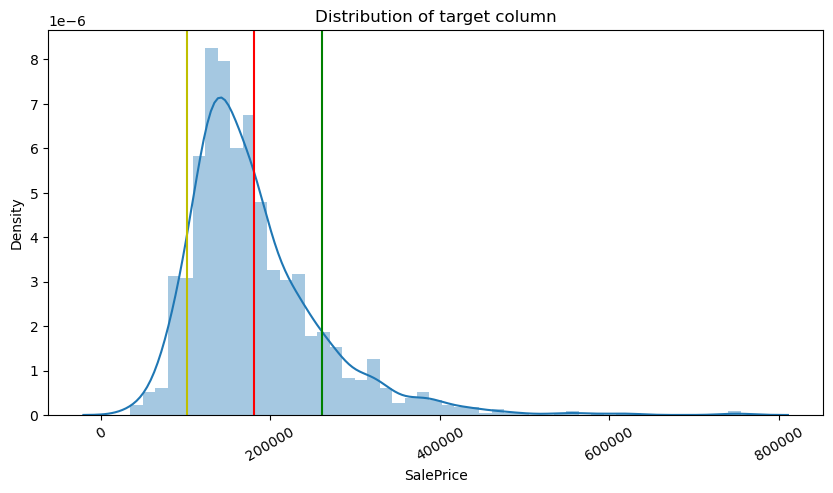

In [11]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=30)
sns.distplot(df['SalePrice'])
plt.axvline(df['SalePrice'].mean(), color = 'r')
plt.axvline((df['SalePrice'].mean() - df['SalePrice'].std()), color = 'y')
plt.axvline((df['SalePrice'].mean() + df['SalePrice'].std()), color = 'g')
plt.title('Distribution of target column')
plt.show()

In [12]:
# choosing a random value from saleprice
np.random.choice(df['SalePrice'], 10)

array([207000, 163000, 415298, 130000, 234000, 107000,  84500, 215000,
       262500, 140200], dtype=int64)

In [13]:
# Let's take seed so that everytime the random values come out to be constant
# np.random.seed(5)

# take 300 sample values from the dataset of 1460 values (~20%)
sample_saleprice = np.random.choice(df['SalePrice'], 300)

# comparing the population and  sample
# population
print('population mean:', np.mean(df['SalePrice']))
print('population median:', np.median(df['SalePrice']))
print('population std:', np.std(df['SalePrice']))

# sample
print(f'\nsample mean: {np.mean(sample_saleprice)}')
print(f'sample median: {np.median(sample_saleprice)}')
print(f'sample std: {np.std(sample_saleprice)}')

population mean: 180921.19589041095
population median: 163000.0
population std: 79415.29188606751

sample mean: 176908.54333333333
sample median: 164490.0
sample std: 66390.32563977066


In [14]:
import pylab
import statsmodels.api as sm

In [15]:
# create function to plot the quantile
def create_qqplot(data, title):
    sm.qqplot(data, line = '45')
    plt.title(title)
    pylab.show()

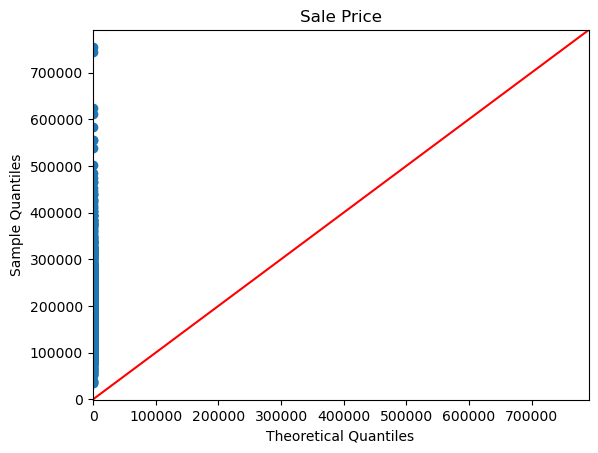

In [16]:
# create qqplot (saleprice)
create_qqplot(df['SalePrice'], 'Sale Price')

In [17]:
# use the normality test
from scipy.stats import shapiro, normaltest, anderson

In [18]:
# function the normality test
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])},
              'Shapiro' : shapiro(data)[1],
              'K^2' : normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [19]:
# check using anderson
try_normal(df['SalePrice'])

{'Anderson': {15.0: 0.574,
  10.0: 0.654,
  5.0: 0.785,
  2.5: 0.916,
  1.0: 1.089,
  'stat': 41.69199630641583},
 'Shapiro': 3.2072044604461286e-33,
 'K^2': 2.283848353787728e-133}

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/2_parametric-vs-nonparametric.jpeg)

In [22]:
from scipy.stats import zscore, ttest_ind, f_oneway, mannwhitneyu, wilcoxon, kruskal
from statsmodels.stats.weightstats import ztest

if Pvalues < Alpha (0.05): H0 Rejected

In [24]:
# H0: tidak terdapat perbedaan rata2 sale price antara rumah yang dijual di oldtown dengan di tempat lain
# Ha: 

# getting z-stats, p-value
oldtown_saleprice = df[df['Neighborhood'] == 'OldTown']['SalePrice']
mean_value = df['SalePrice'].mean()
z_statistics, p_value = ztest(x1 = oldtown_saleprice,
                              value = mean_value)
z_statistics, p_value

(-10.639294263334575, 1.9560526026260018e-26)

P value: 1.95 > Alpha, therefore the implication is H0 rejected, meaning that there are a difference in mean sale price on houses in Old Town and other neighborhoods

In [ ]:
# H0: tidak terdapat perbedaan rata2 sale price antara rumah yang dijual di tahun 2008 dengan di tahun lain
# Ha:

# t-test example
all_pub_prices = df['YrSold'] == 

In [25]:
# Mann-Whitney U test example (compare houses with or without a second floor)
second_floor = df[df['2ndFlrSF'] > 0]['SalePrice']
no_second_floor = df[df['2ndFlrSF'] == 0]['SalePrice']
mann_whitney_stat, mann_whitney_p = mannwhitneyu(second_floor, no_second_floor, alternative = 'two-sided')

# Wilcoxon Signed-Rank test example (compare years built to years remodeled
rmodeled = df[df['YearBuiilt'] != df['YearRemodAdd']][['YearBuilt', 'YearRemoAdd']].dropna())

## REFERENCES
1. https://datatab.net/tutorial/descriptive-inferential-statistics
2. https://www.scribbr.com/statistics/inferential-statistics/
3. https://www.questionpro.com/blog/inferential-statistics/
4. https://www.investopedia.com/terms/g/goodness-of-fit.asp#:~:text=Goodness%2Dof%2DFit%20is%20a%20statistical%20hypothesis%20test%20used%20to,are%20from%20the%20same%20distribution
5. https://www.analyticsvidhya.com/blog/2021/06/hypothesis-testing-parametric-and-non-parametric-tests-in-statistics/
6. https://github.com/CahyaPutera/CUSTOMER-CHURN-PREDICTION/blob/master/FINAL%20PROJECT%20CHURN%20(V.2)%20-%20EDA%20(Revised).ipynb